In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import os
import scipy.io as sio
from scipy import interpolate, signal
from pyproj import Proj,transform
import sys
sys.path.append('/ocean/ssahu/CANYONS/wcvi/grid/')
from bathy_common import *
from matplotlib import path
from salishsea_tools import viz_tools
from netCDF4 import Dataset
import xarray as xr
from salishsea_tools import nc_tools
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.gridspec as gridspec
%matplotlib inline
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


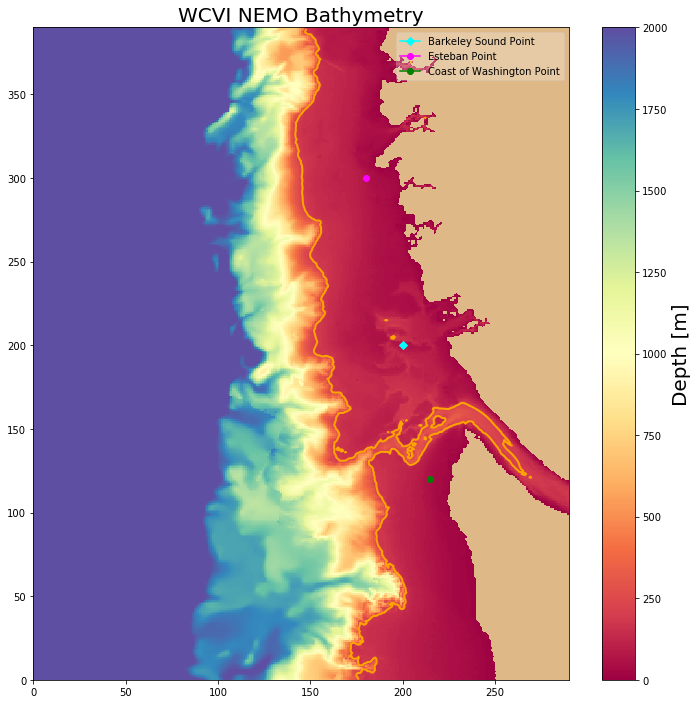

In [7]:
bathy = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc')

Z = bathy.variables['Bathymetry'][:]


grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon = grid['glamt'][0,...]
lat = grid['gphit'][0,...]


grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')



x_slice = np.arange(Z.shape[1])
y_slice = np.arange(Z.shape[0])

lon = grid['glamt'][0,...]
lat = grid['gphit'][0,...]

z0 = np.ma.masked_values(Z, 0)
# plt.plot(lon[::10,::10],lat[::10,::10],'m.')
cmap = plt.get_cmap('Spectral')
# cmap.set_bad('gainsboro')
# cmap = cmo.cm.deep
cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(12,12)); ax.grid()
p = ax.pcolormesh(z0, cmap=cmap, vmin=0)#, vmax=500)
n=10
# ax.scatter(lon[::n,::n], lat[::n,::n], c='orangered', s=30, alpha=0.6)
# ax.set_xlim([lon.min(), lon.max()])
# ax.set_ylim([lat.min(), lat.max()])



ax.set_title('WCVI NEMO Bathymetry', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, color='burlywood')
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off')
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left='off',      # ticks along the bottom edge are off
#     labelleft='off')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
CS = ax.contour(z0, levels = [200], colors=('orange',),linestyles=('-',),linewidths=(2,))
ax.plot(
    x_slice[200], y_slice[200],
    linestyle='-', marker='D', color='cyan',
    label='Barkeley Sound Point',)
ax.plot(
    x_slice[180], y_slice[300],
    linestyle='-', marker='o', color='magenta',
    label='Esteban Point',)
ax.plot(
    x_slice[215], y_slice[120],
    linestyle='-', marker='o', color='green',
    label='Coast of Washington Point',)
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
# plt.savefig('domain.png')

### Esteban Point

In [3]:
print(lon[300,180],lat[300,180])

-126.52743329 49.3029809382


In [51]:
np.where(big_lat>49.3)

(array([158, 158, 158, ..., 399, 399, 399]),
 array([296, 297, 298, ..., 297, 298, 299]))

In [81]:
np.where(big_lon>-126.52)

(array([  0,   0,   0, ..., 399, 399, 399]),
 array([121, 122, 123, ..., 297, 298, 299]))

In [97]:
A = big_lon[(big_lon > -126.53) & (big_lon<-126.52)]

In [111]:
np.where(big_lon == A[57])

(array([169]), array([161]))

In [113]:
big_lon[169,161]

-126.52696414109747

In [115]:
B = big_lat[(big_lon > -126.53) & (big_lon<-126.52)]

In [122]:
np.where((B>49.29) & (B<49.32))

(array([61]),)

In [125]:
np.where(big_lat == B[61])

(array([185]), array([165]))

In [127]:
big_lon[185,165]

-126.52220004345261

In [128]:
big_lat[185,165]

49.317866369685554

### Barkley Sound point

In [52]:
print(lon[200,200],lat[200,200])

-125.489680259 48.6515688898


In [59]:
A = big_lon[(big_lon > -125.4897) & (big_lon<-125.4895)]

In [62]:
np.where(big_lon == A[2])

(array([318]), array([227]))

In [82]:
B = big_lat[(big_lon > -125.4897) & (big_lon<-125.4895)]

In [83]:
B

array([ 45.74059635,  49.12597851,  52.38836345])

In [67]:
np.where(big_lat == B[1])

(array([169]), array([194]))

In [68]:
print(big_lon[169,194],big_lat[169,194])

-125.489527394 49.1259785052


### Coast of Washington

In [76]:
print(lon[215,120],lat[215,120])

-126.543526884 48.4236968045


In [84]:
B = big_lat[(big_lon > -126.5437) & (big_lon<-126.5435)]

In [86]:
B

array([ 45.35801666,  48.29376964,  51.28795021])

In [87]:
np.where(big_lat == B[1])

(array([138]), array([153]))

In [88]:
print(big_lon[138,153],big_lat[138,153])

-126.543635273 48.2937696358


In [50]:
atmos_forcing_file = nc.Dataset('/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d19.nc')
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'



u_wind = atmos_forcing_file.variables['u_wind'][:,185,165]
v_wind = atmos_forcing_file.variables['v_wind'][:,185,165]
timesteps =u_wind.shape[0]

bathy_file = nc.Dataset(bathy)

big_lon_atmos = atmos_forcing_file.variables['nav_lon'][:]

big_lon = np.empty_like(big_lon_atmos)
big_lon[:] = big_lon_atmos[:] - 360

big_lat = atmos_forcing_file.variables['nav_lat'][:]





In [141]:
nc_tools.show_variable_attrs(atmos_forcing_file)

<class 'netCDF4._netCDF4.Variable'>
float32 atmpres(time_counter, y, x)
    _FillValue: 9.999e+20
    short_name: PRMSL_meansealevel
    long_name: Pressure Reduced to MSL
    level: mean sea level
    units: Pa
    coordinates: longitude latitude
unlimited dimensions: time_counter
current shape = (24, 400, 300)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 nav_lat(y, x)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (400, 300)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 nav_lon(y, x)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (400, 300)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 precip(time_counter, y, x)
    _FillValue: 9.999e+20
    short_name: APCP_surface
    long_name: Total Precipitation
    level: surface
    units: kg/m^2
    coordinates: longitude latitude
unl

In [4]:
def uv_wind_timeseries_at_point(grid_weather, j, i, datetimes=False):
    """Return the u and v wind components and time counter values
    at a single grid point from a weather forcing dataset.

    :arg grid_weather: Weather forcing dataset, typically from an
                       :file:`ops_yYYYYmMMdDD.nc` file produced by the
                       :py:mod:`nowcast.workers.grid_to_netcdf` worker.
    :type grid_weather: :py:class:`netCDF4.Dataset`

    :arg int j: j-direction (longitude) index of grid point to get wind
                components at.

    :arg int i: i-direction (latitude) index of grid point to get wind
                components at.

    :arg boolean datetimes: Return time counter values as
                            :py:class:`datetime.datetime` objects if
                            :py:obj:`True`, otherwise return them as
                            :py:class:`arrow.Arrow` objects (the default).

    :returns: 2-tuple of 1-dimensional :py:class:`numpy.ndarray` objects,
              The :py:attr:`u` attribute holds the u-direction wind
              component,
              The :py:attr:`v` attribute holds the v-direction wind
              component,
              and the :py:attr:`time` attribute holds the time counter
              values.
    :rtype: :py:class:`collections.namedtuple`
    """
    u_wind = grid_weather.variables['u_wind'][:, j, i]
    v_wind = grid_weather.variables['v_wind'][:, j, i]
    time = timestamp(grid_weather, range(len(u_wind)))
    if datetimes:
        time = np.array([a.datetime for a in time])
    wind_ts = namedtuple('wind_ts', 'u, v, time')

    return wind_ts(u_wind, v_wind, np.array(time))

def timestamp(dataset, tindex, time_var='time_counter'):
    """Return the time stamp of the tindex time_counter value(s) in dataset.

    The time stamp is calculated by adding the time_counter[tindex] value
    (in seconds) to the dataset's time_counter.time_origin value.

    :arg dataset: netcdf dataset object
    :type dataset: :py:class:`netCDF4.Dataset`

    :arg tindex: time_counter variable index.
    :type tindex: int or iterable

    :arg time_var: name of the time variable
    :type time_var: str

    :returns: Time stamp value(s) at tindex in the dataset.
    :rtype: :py:class:`Arrow` instance or list of instances
    """
    time_orig = time_origin(dataset, time_var=time_var)
    time_counter = dataset.variables[time_var]
    try:
        iter(tindex)
    except TypeError:
        tindex = [tindex]
    results = []
    for i in tindex:
        try:
            results.append(time_orig + timedelta(seconds=time_counter[i]))
        except IndexError:
            raise IndexError(
                'time_counter variable has no tindex={}'.format(tindex))
    if len(results) > 1:
        return results
    else:

        return results[0]

def time_origin(dataset, time_var='time_counter'):
    """Return the time_var.time_origin value.

    :arg dataset: netcdf dataset object
    :type dataset: :py:class:`netCDF4.Dataset` or :py:class:`xarray.Dataset`

    :arg time_var: name of time variable
    :type time_var: str

    :returns: Value of the time_origin attribute of the time_counter
              variable.
    :rtype: :py:class:`Arrow` instance
    """
    try:
        time_counter = dataset.variables[time_var]
    except KeyError:
        raise KeyError(
            'dataset does not have {time_var} variable'.format(
                time_var=time_var))
    try:
        # netCDF4 dataset
        time_orig = time_counter.time_origin.title()
    except AttributeError:
        try:
            # xarray dataset
            time_orig = time_counter.attrs['time_origin'].title()
        except KeyError:
            raise AttributeError(
                'NetCDF: '
                '{time_var} variable does not have '
                'time_origin attribute'.format(time_var=time_var))
    value = arrow.get(
        time_orig,
        ['YYYY-MMM-DD HH:mm:ss',
         'DD-MMM-YYYY HH:mm:ss',
         'YYYY-MM-DD HH:mm:ss'])

    return value



In [5]:
import glob
import os

# for infile in sorted(glob.glob('/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04*.nc')):
#     print(infile)
    
wind = np.empty((30))
for file in sorted(glob.glob('/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04*.nc')):
#     wind[file] = nc.Dataset(file).variables['u_wind'][0,185,165]
    print(file)


/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d01.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d02.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d03.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d04.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d05.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d06.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d07.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d08.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d09.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d10.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d11.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d12.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d13.nc
/ocean/ssahu/CANYONS/nemo-forcing/43_d

In [170]:
wind.shape

()

In [69]:
from __future__ import division

from collections import namedtuple, OrderedDict
from datetime import (
    datetime,
    timedelta,
)
from resource import getrlimit, RLIMIT_NOFILE
import os

import arrow
import netCDF4 as nc
import pandas as pd
import numpy as np

import warnings

from salishsea_tools import hg_commands as hg

vwind_es = np.empty
uwind_es = np.empty
time_es = np.empty

for file in sorted(glob.glob('/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04*.nc')):
    wind_ts_es = uv_wind_timeseries_at_point(nc.Dataset(file), 185,165, datetimes=False)
    uwind_es = np.append(uwind_es , wind_ts_es[0])
    vwind_es = np.append(vwind_es, wind_ts_es[1])
    time_es = np.append(time_es, wind_ts_es[2])

In [72]:
vwind_bs = np.empty
uwind_bs = np.empty
time_bs = np.empty

for file in sorted(glob.glob('/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04*.nc')):
    wind_ts_bs = uv_wind_timeseries_at_point(nc.Dataset(file), 169, 194, datetimes=False)
    uwind_bs = np.append(uwind_bs , wind_ts_bs[0])
    vwind_bs = np.append(vwind_bs, wind_ts_bs[1])
    time_bs = np.append(time_bs, wind_ts_bs[2])

In [89]:
vwind_cw = np.empty
uwind_cw = np.empty
time_cw = np.empty

for file in sorted(glob.glob('/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04*.nc')):
    wind_ts_cw = uv_wind_timeseries_at_point(nc.Dataset(file), 138, 153, datetimes=False)
    uwind_cw = np.append(uwind_cw , wind_ts_cw[0])
    vwind_cw = np.append(vwind_cw, wind_ts_cw[1])
    time_cw = np.append(time_cw, wind_ts_cw[2])

In [31]:
avg_wind = np.empty_like(vwind)

for i in np.arange(1,uwind.shape[0]):
    avg_wind[i] = np.sqrt(np.multiply(uwind[i],uwind[i])+np.multiply(vwind[i],vwind[i]))

In [176]:
wind_ts[1]

array([-7.98420525, -7.01651478, -7.23839617, -7.86166763, -8.31365395,
       -8.32699299, -7.53589344, -7.28586292, -7.27980852, -7.03044939,
       -5.99602175, -5.41725731, -5.35010624, -1.0183692 ,  0.22623047,
        0.86915892,  1.66847169,  2.40534353,  3.16672373,  2.21283078,
        1.43227053, -0.01460449, -2.03052545, -2.37840891], dtype=float32)

In [13]:
wind_ts[2][1].datetime

datetime.datetime(2016, 4, 30, 1, 0, tzinfo=tzutc())

In [195]:
vwind = np.array(vwind)

In [20]:
time[1].datetime

AttributeError: 'numpy.ndarray' object has no attribute 'datetime'

In [24]:
time.shape[0]

721

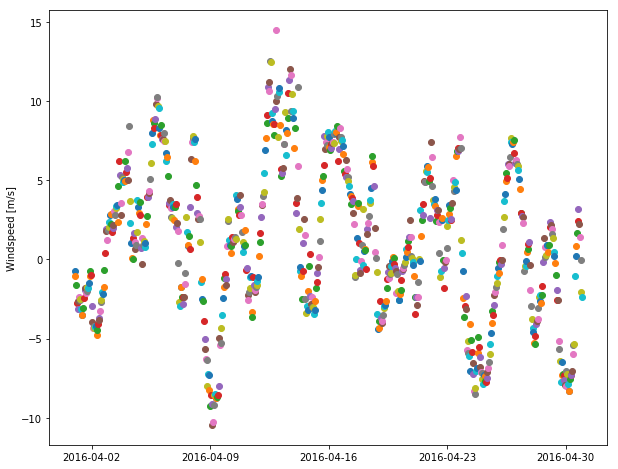

In [35]:


# from salishsea_tools import nc_tools, data_tools, tidetools, visualisations, viz_tools, stormtools, geo_tools
from collections     import OrderedDict
from matplotlib      import pyplot, animation, rcParams, patches
from dateutil        import parser
import datetime
import os
import numpy as np
import xarray


fig, ax = pyplot.subplots(1, 1, figsize=(10,8))


for i in np.arange(1,time.shape[0]):
    ax.plot(time[i].datetime, vwind[i], 'o')
#     ax[index].plot(GEM.time, np.sqrt(GEM.u_wind.isel(gridX=i, gridY=j)**2 + GEM.v_wind.isel(gridX=i, gridY=j)**2), 'r-')
ax.set_ylabel('Windspeed [m/s]')
    


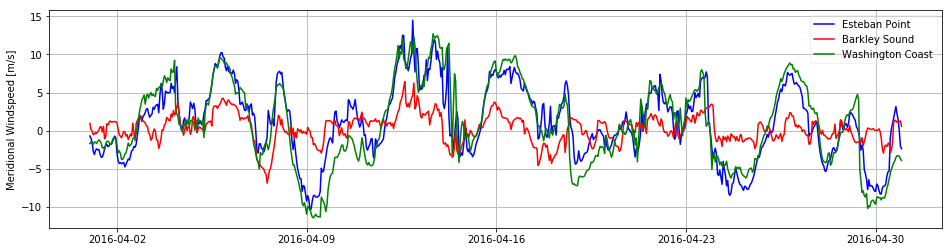

In [90]:
# from salishsea_tools import nc_tools, data_tools, tidetools, visualisations, viz_tools, stormtools, geo_tools
from collections     import OrderedDict
from matplotlib      import pyplot, animation, rcParams, patches
from dateutil        import parser
import datetime
import os
import numpy as np
import xarray


fig, ax = pyplot.subplots(1, 1, figsize=(16,4))

date_time = np.empty_like(time)

for i in np.arange(1,time.shape[0]):
    date_time[i]  = time[i].datetime
    

ax.plot(date_time[1:], vwind_es[1:], 'b-', label = 'Esteban Point')
ax.plot(date_time[1:], vwind_bs[1:], 'r-', label = 'Barkley Sound')
ax.plot(date_time[1:], vwind_cw[1:], 'g-', label = 'Washington Coast')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
#     ax[index].plot(GEM.time, np.sqrt(GEM.u_wind.isel(gridX=i, gridY=j)**2 + GEM.v_wind.isel(gridX=i, gridY=j)**2), 'r-')
ax.set_ylabel('Meridional Windspeed [m/s]')
ax.grid()    

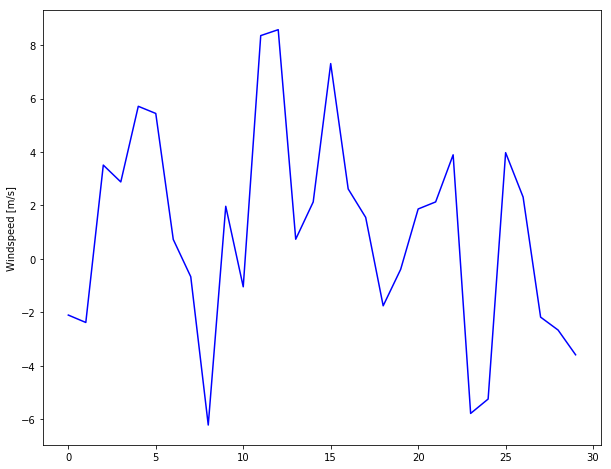

In [215]:

# from salishsea_tools import nc_tools, data_tools, tidetools, visualisations, viz_tools, stormtools, geo_tools
from collections     import OrderedDict
from matplotlib      import pyplot, animation, rcParams, patches
from dateutil        import parser
import datetime
import os
import numpy as np
import xarray


fig, ax = pyplot.subplots(1, 1, figsize=(10,8))


ax.plot(vwind[1:], 'b-')
#     ax[index].plot(GEM.time, np.sqrt(GEM.u_wind.isel(gridX=i, gridY=j)**2 + GEM.v_wind.isel(gridX=i, gridY=j)**2), 'r-')
ax.set_ylabel('Windspeed [m/s]')
    

In [210]:
layout = dict(
    title = "Manually Set Date Range",
    xaxis = dict(
        range = ['2014-04-01','2014-94-30'])
)

In [212]:
import plotly.plotly as py
fig = dict(data=vwind[1:], layout=layout)
py.iplot(fig, filename = "Manually Set Range")

ImportError: No module named 'plotly'

In [131]:
u_wind.shape

(24,)

In [30]:
big_lon[248,180]

-126.52714611931367

In [39]:
np.min(big_lat)

44.689622999999983

##  We choose 7th April as a downwelling case and 26th April as a upwelling case from the images above

In [61]:
atmos_forcing_file = nc.Dataset('/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d24.nc')
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'



u_wind = atmos_forcing_file.variables['u_wind']
v_wind = atmos_forcing_file.variables['v_wind']
timesteps =u_wind.shape[0]

bathy_file = nc.Dataset(bathy)

lon = bathy_file.variables['nav_lon'][:]
lat = bathy_file.variables['nav_lat'][:]


X = lon.flatten()
Y = lat.flatten()

points = (X[:],Y[:])

big_lon_atmos = atmos_forcing_file.variables['nav_lon'][:]

big_lon = np.empty_like(big_lon_atmos)
big_lon[:] = big_lon_atmos[:] - 360

big_lat = atmos_forcing_file.variables['nav_lat'][:]

X_big = big_lon.flatten()
Y_big = big_lat.flatten()

xi = (X_big[:],Y_big[:])

interp_wind_u = np.empty((u_wind.shape[0], lon.shape[0], lon.shape[1]))
interp_wind_v = np.empty_like(interp_wind_u)

for i in np.arange(u_wind.shape[0]):
    interp_wind_u[i,...] = np.reshape(griddata(xi, u_wind[i,...].flatten(), points, method= 'linear'), lon.shape)
    interp_wind_v[i,...] = np.reshape(griddata(xi, v_wind[i,...].flatten(), points, method= 'linear'), lon.shape)




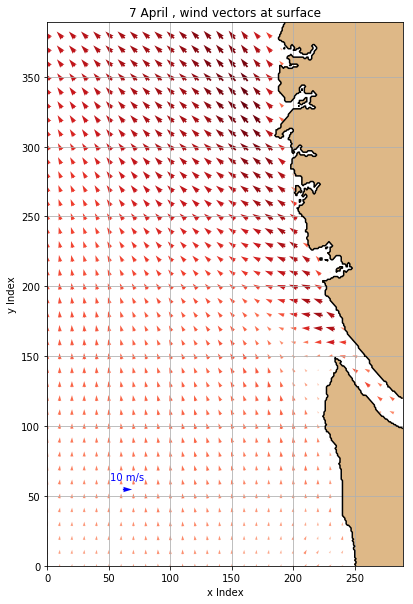

In [56]:
y_slice = np.arange(lat.shape[0])
x_slice = np.arange(lat.shape[1])
t = 23




u_tzyx_wind, v_tzyx_wind = viz_tools.unstagger(interp_wind_u[t,...], interp_wind_v[t,...])
speeds_wind = np.sqrt(np.square(u_tzyx_wind) + np.square(v_tzyx_wind))


arrow_step = 10
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

fig, ax = plt.subplots(1, 1, figsize=(10,10))
X,Y = np.meshgrid(x_slice_a,y_slice_a)


# Plot the velocity vectors

# fig, ax = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax)
quiver = ax.quiver(X, Y, u_tzyx_wind[::arrow_step,::arrow_step], v_tzyx_wind[::arrow_step,::arrow_step], speeds_wind[::arrow_step,::arrow_step] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
viz_tools.plot_coastline(ax, bathy)


ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title('{0} April , wind vectors at surface'.format((t+7-23)))
ax.quiverkey(quiver, 65, 55, 10, '10 m/s', coordinates='data', color='blue', labelcolor='blue')


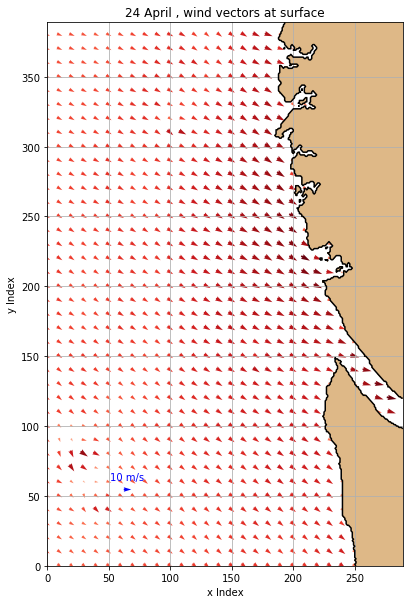

In [63]:
y_slice = np.arange(lat.shape[0])
x_slice = np.arange(lat.shape[1])
t = 23




u_tzyx_wind, v_tzyx_wind = viz_tools.unstagger(interp_wind_u[t,...], interp_wind_v[t,...])
speeds_wind = np.sqrt(np.square(u_tzyx_wind) + np.square(v_tzyx_wind))


arrow_step = 10
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

fig, ax = plt.subplots(1, 1, figsize=(10,10))
X,Y = np.meshgrid(x_slice_a,y_slice_a)


# Plot the velocity vectors

# fig, ax = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax)
quiver = ax.quiver(X, Y, u_tzyx_wind[::arrow_step,::arrow_step], v_tzyx_wind[::arrow_step,::arrow_step], speeds_wind[::arrow_step,::arrow_step] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
viz_tools.plot_coastline(ax, bathy)


ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title('{0} April , wind vectors at surface'.format((t+24-23)))
ax.quiverkey(quiver, 65, 55, 10, '10 m/s', coordinates='data', color='blue', labelcolor='blue')


In [8]:
u_vel = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/full_config_30_days/WCVI_1h_20160402_20160509_grid_U.nc')
v_vel = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/full_config_30_days/WCVI_1h_20160402_20160509_grid_V.nc')



tracers = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/full_config_30_days/WCVI_1h_20160402_20160509_grid_T.nc')



ssh = tracers.variables['sossheig']
lats = tracers.variables['nav_lat']
lons = tracers.variables['nav_lon']
sal = tracers.variables['vosaline']



ugrid = u_vel.variables['vozocrtx']
vgrid = v_vel.variables['vomecrty']

zlevels = u_vel.variables['depthu']
timesteps = u_vel.variables['time_counter']
lat = u_vel.variables['nav_lat']
lon = u_vel.variables['nav_lon']

### Esteban Point

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


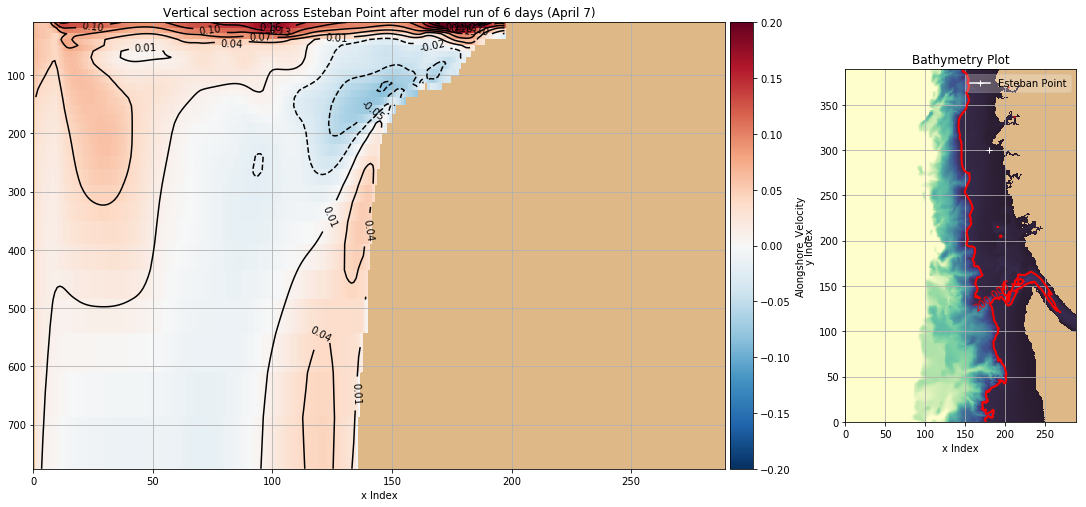

In [74]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-0.1,vmax=0.1)



# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathymetry = bathy
x_slice = np.arange(Z.shape[1])
y_slice = np.arange(Z.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[180], y_slice[300],
    linestyle='-', marker='+', color='white',
    label='Esteban Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()



# Plot 24h average salinity at all depths along thalweg line
t = 143 

v_0 = vgrid[t, :, :,:]
v_masked = np.ma.masked_values(v_0, 0)



cmap = plt.cm.get_cmap('RdBu_r')
cmap.set_bad(land_colour)
x, z = np.meshgrid(x_slice, zlevels[:30])
mesh = axl.pcolormesh(x_slice, zlevels[:30], v_masked[:30,300,x_slice], cmap=cmap, vmin = -0.2, vmax = 0.2)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Alongshore_Velocity')
clines = axl.contour(x_slice, zlevels[:30], v_masked[:30,300,x_slice], np.arange(-0.2, 0.2, 0.03), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Esteban Point after model run of 6 days (April 7)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


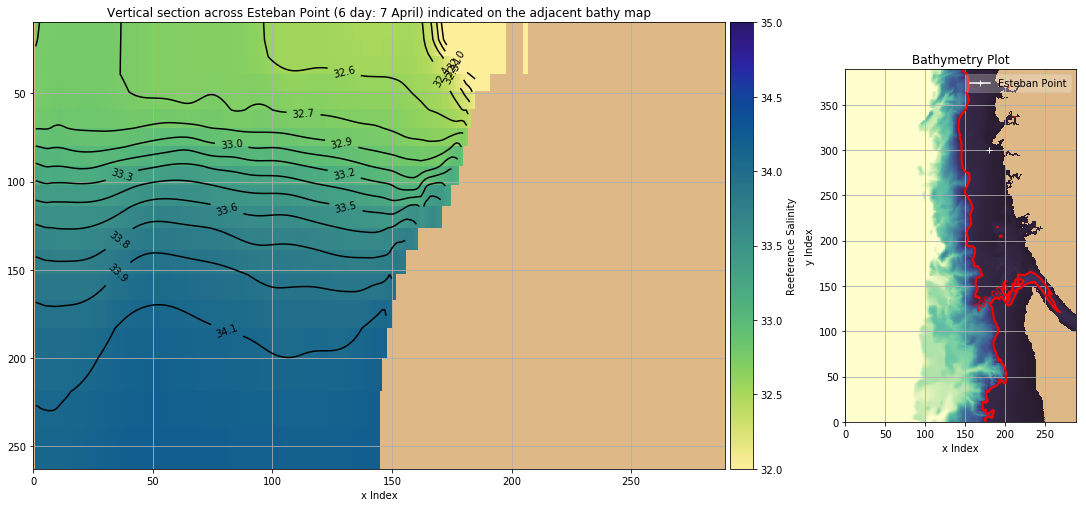

In [73]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[180], y_slice[300],
    linestyle='-', marker='+', color='white',
    label='Esteban Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 143
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(x_slice, zlevels[:20], sal_tzyx[:20,300,x_slice], cmap=cmap, vmin=32, vmax=35)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:20], sal_tzyx[:20,300,x_slice], np.arange(32, 35, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Esteban Point (6 day: 7 April) indicated on the adjacent bathy map')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


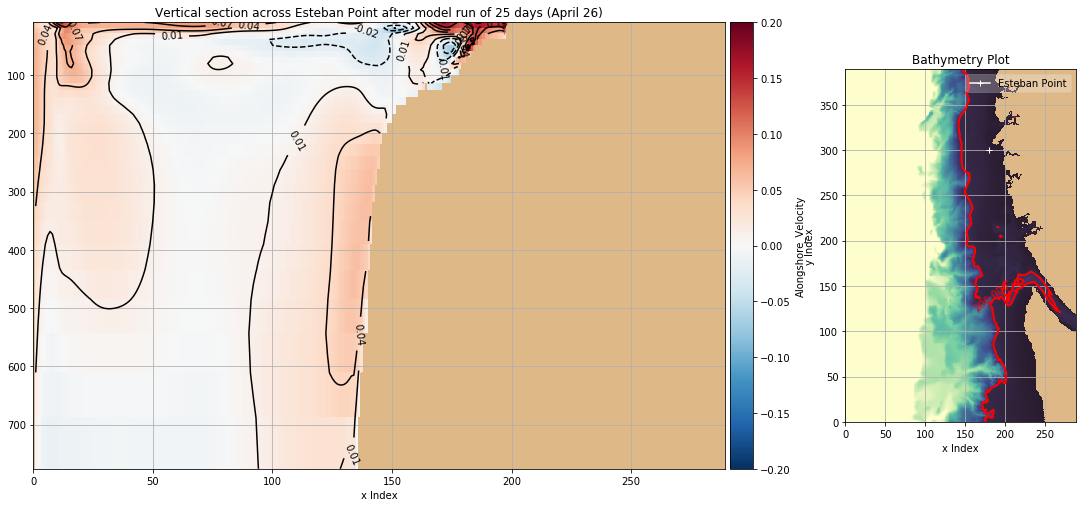

In [72]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-0.1,vmax=0.1)



# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathymetry = bathy
x_slice = np.arange(Z.shape[1])
y_slice = np.arange(Z.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[180], y_slice[300],
    linestyle='-', marker='+', color='white',
    label='Esteban Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()



# Plot 24h average salinity at all depths along thalweg line
t = 599 

v_0 = vgrid[t, :, :,:]
v_masked = np.ma.masked_values(v_0, 0)



cmap = plt.cm.get_cmap('RdBu_r')
cmap.set_bad(land_colour)
x, z = np.meshgrid(x_slice, zlevels[:30])
mesh = axl.pcolormesh(x_slice, zlevels[:30], v_masked[:30,300,x_slice], cmap=cmap, vmin = -0.2, vmax = 0.2)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Alongshore_Velocity')
clines = axl.contour(x_slice, zlevels[:30], v_masked[:30,300,x_slice], np.arange(-0.2, 0.2, 0.03), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Esteban Point after model run of 25 days (April 26)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


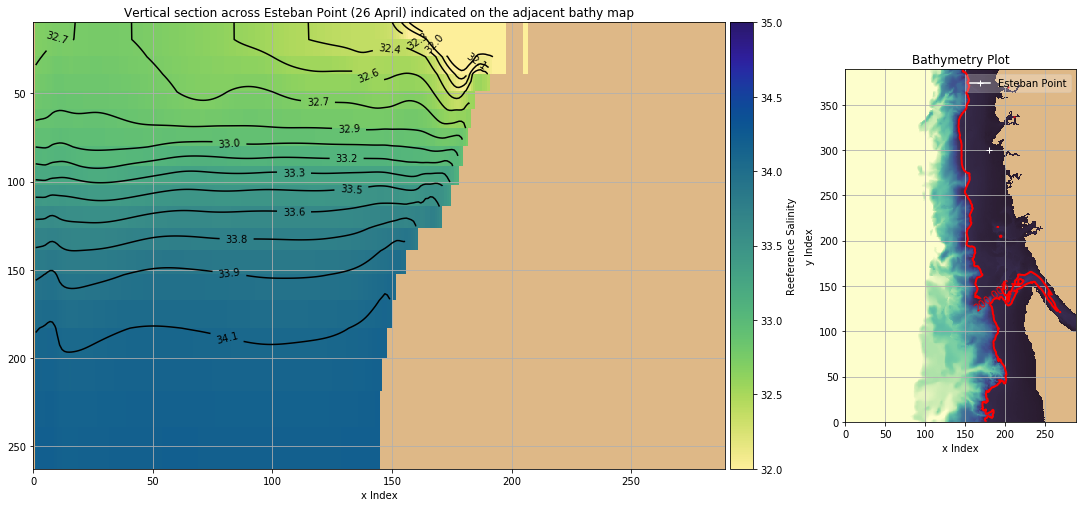

In [71]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[180], y_slice[300],
    linestyle='-', marker='+', color='white',
    label='Esteban Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 599
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(x_slice, zlevels[:20], sal_tzyx[:20,300,x_slice], cmap=cmap, vmin=32, vmax=35)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:20], sal_tzyx[:20,300,x_slice], np.arange(32, 35, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Esteban Point (26 April) indicated on the adjacent bathy map')

### Coast of Washington

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


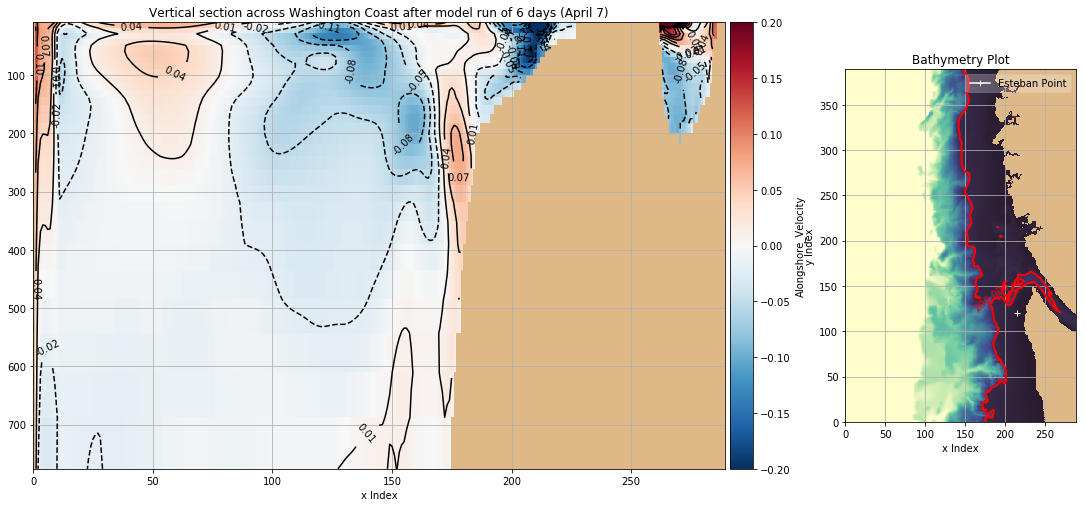

In [69]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-0.1,vmax=0.1)



# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathymetry = bathy
x_slice = np.arange(Z.shape[1])
y_slice = np.arange(Z.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[215], y_slice[120],
    linestyle='-', marker='+', color='white',
    label='Esteban Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()



# Plot 24h average salinity at all depths along thalweg line
t = 143 

v_0 = vgrid[t, :, :,:]
v_masked = np.ma.masked_values(v_0, 0)



cmap = plt.cm.get_cmap('RdBu_r')
cmap.set_bad(land_colour)
x, z = np.meshgrid(x_slice, zlevels[:30])
mesh = axl.pcolormesh(x_slice, zlevels[:30], v_masked[:30,120,x_slice], cmap=cmap, vmin = -0.2, vmax = 0.2)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Alongshore_Velocity')
clines = axl.contour(x_slice, zlevels[:30], v_masked[:30,120,x_slice], np.arange(-0.2, 0.2, 0.03), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Washington Coast after model run of 6 days (April 7)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


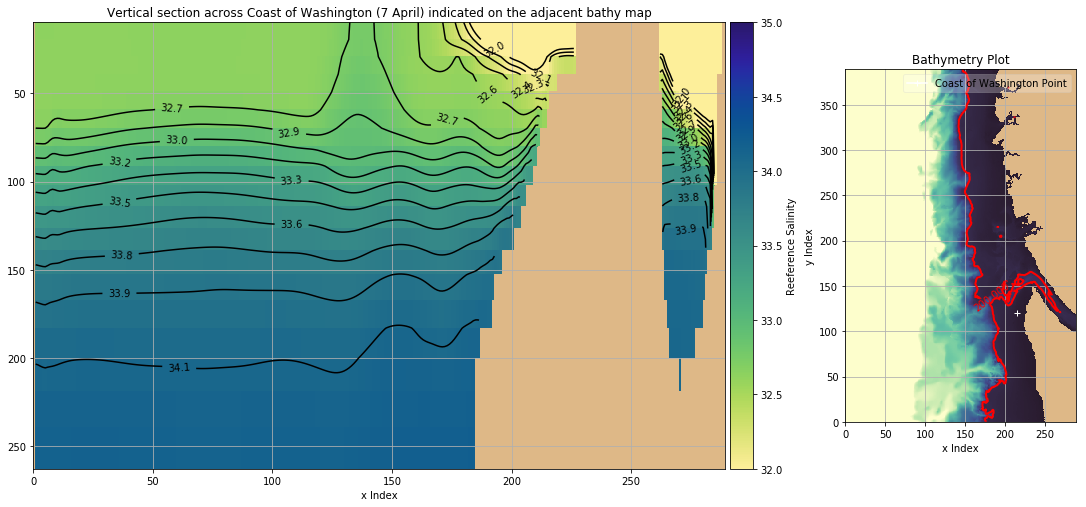

In [79]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[215], y_slice[120],
    linestyle='-', marker='+', color='white',
    label='Coast of Washington Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 143
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(x_slice, zlevels[:20], sal_tzyx[:20,120,x_slice], cmap=cmap, vmin=32, vmax=35)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:20], sal_tzyx[:20,120,x_slice], np.arange(32, 35, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Coast of Washington (7 April) indicated on the adjacent bathy map')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


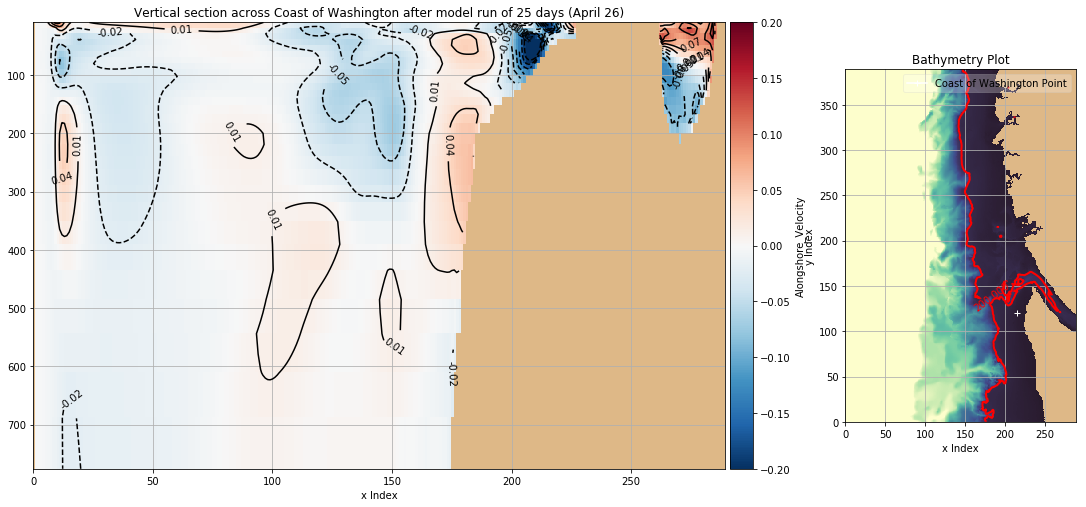

In [76]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-0.1,vmax=0.1)



# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathymetry = bathy
x_slice = np.arange(Z.shape[1])
y_slice = np.arange(Z.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[215], y_slice[120],
    linestyle='-', marker='+', color='white',
    label='Coast of Washington Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()



# Plot 24h average salinity at all depths along thalweg line
t = 599 

v_0 = vgrid[t, :, :,:]
v_masked = np.ma.masked_values(v_0, 0)



cmap = plt.cm.get_cmap('RdBu_r')
cmap.set_bad(land_colour)
x, z = np.meshgrid(x_slice, zlevels[:30])
mesh = axl.pcolormesh(x_slice, zlevels[:30], v_masked[:30,120,x_slice], cmap=cmap, vmin = -0.2, vmax = 0.2)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Alongshore_Velocity')
clines = axl.contour(x_slice, zlevels[:30], v_masked[:30,120,x_slice], np.arange(-0.2, 0.2, 0.03), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Coast of Washington after model run of 25 days (April 26)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


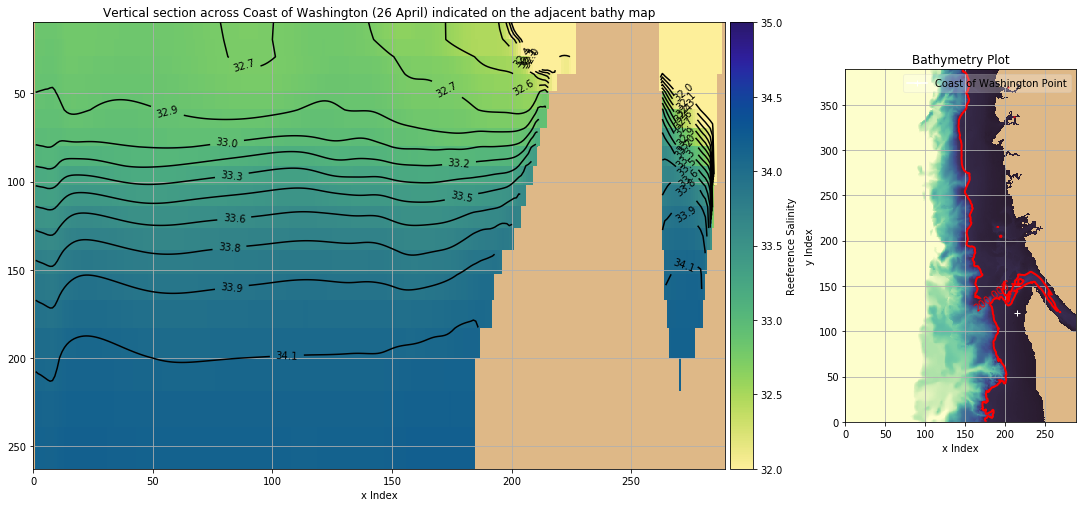

In [77]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[215], y_slice[120],
    linestyle='-', marker='+', color='white',
    label='Coast of Washington Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 599
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(x_slice, zlevels[:20], sal_tzyx[:20,120,x_slice], cmap=cmap, vmin=32, vmax=35)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:20], sal_tzyx[:20,120,x_slice], np.arange(32, 35, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Coast of Washington (26 April) indicated on the adjacent bathy map')

### Barkley Sound

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


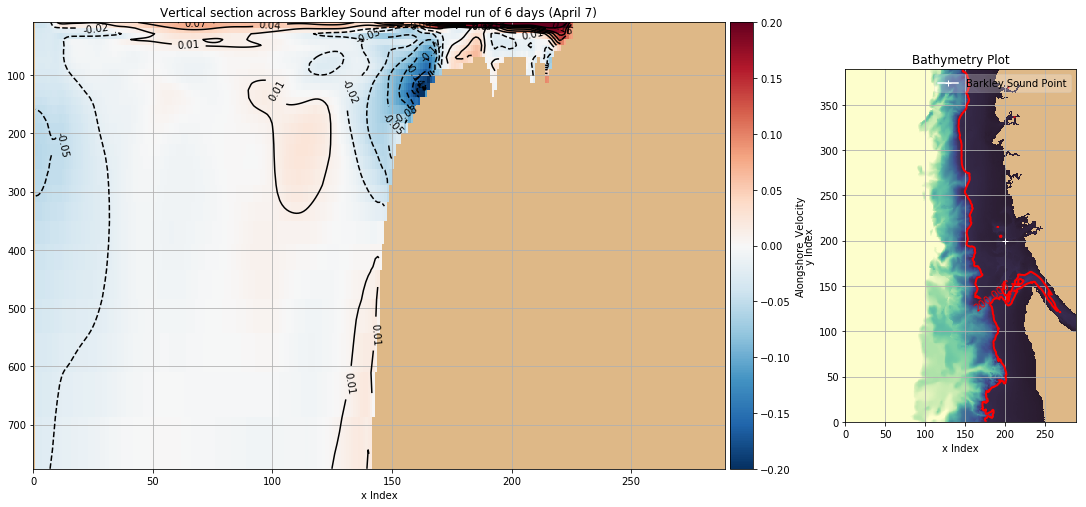

In [78]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-0.1,vmax=0.1)



# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathymetry = bathy
x_slice = np.arange(Z.shape[1])
y_slice = np.arange(Z.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[200], y_slice[200],
    linestyle='-', marker='+', color='white',
    label='Barkley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()



# Plot 24h average salinity at all depths along thalweg line
t = 143 

v_0 = vgrid[t, :, :,:]
v_masked = np.ma.masked_values(v_0, 0)



cmap = plt.cm.get_cmap('RdBu_r')
cmap.set_bad(land_colour)
x, z = np.meshgrid(x_slice, zlevels[:30])
mesh = axl.pcolormesh(x_slice, zlevels[:30], v_masked[:30,200,x_slice], cmap=cmap, vmin = -0.2, vmax = 0.2)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Alongshore_Velocity')
clines = axl.contour(x_slice, zlevels[:30], v_masked[:30,200,x_slice], np.arange(-0.2, 0.2, 0.03), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound after model run of 6 days (April 7)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


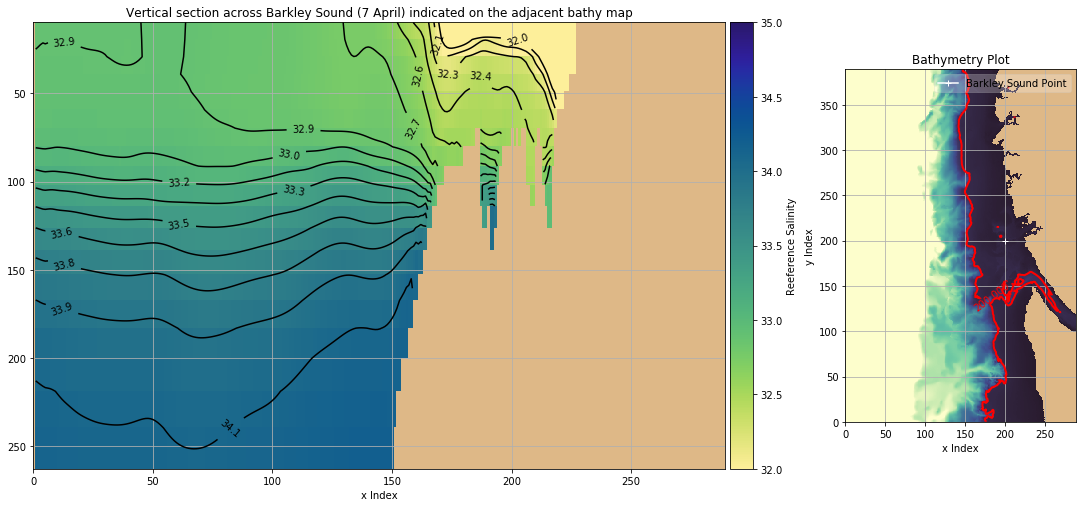

In [80]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[200], y_slice[200],
    linestyle='-', marker='+', color='white',
    label='Barkley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 143
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(x_slice, zlevels[:20], sal_tzyx[:20,200,x_slice], cmap=cmap, vmin=32, vmax=35)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:20], sal_tzyx[:20,200,x_slice], np.arange(32, 35, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound (7 April) indicated on the adjacent bathy map')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


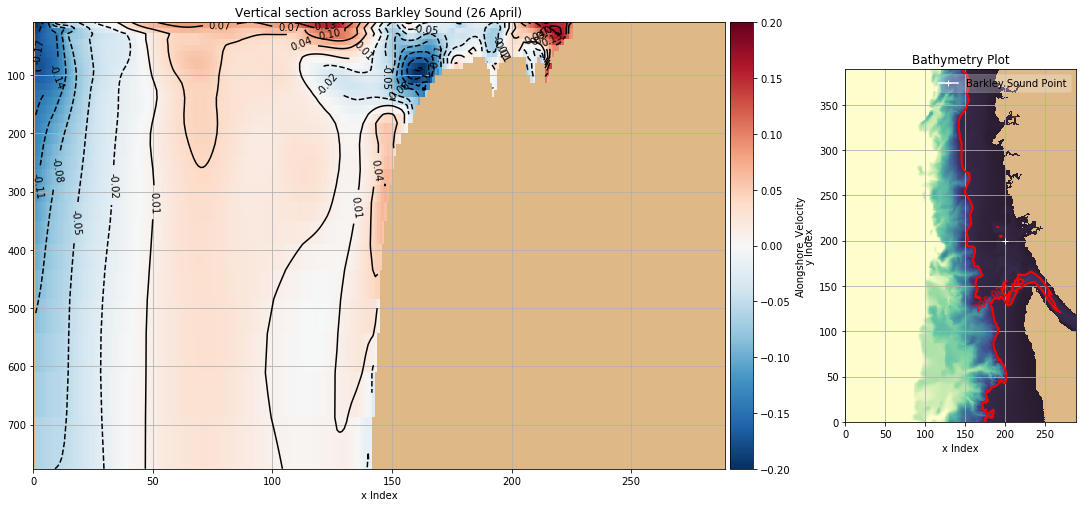

In [81]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-0.1,vmax=0.1)



# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathymetry = bathy
x_slice = np.arange(Z.shape[1])
y_slice = np.arange(Z.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[200], y_slice[200],
    linestyle='-', marker='+', color='white',
    label='Barkley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()



# Plot 24h average salinity at all depths along thalweg line
t = 599 

v_0 = vgrid[t, :, :,:]
v_masked = np.ma.masked_values(v_0, 0)



cmap = plt.cm.get_cmap('RdBu_r')
cmap.set_bad(land_colour)
x, z = np.meshgrid(x_slice, zlevels[:30])
mesh = axl.pcolormesh(x_slice, zlevels[:30], v_masked[:30,200,x_slice], cmap=cmap, vmin = -0.2, vmax = 0.2)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Alongshore_Velocity')
clines = axl.contour(x_slice, zlevels[:30], v_masked[:30,200,x_slice], np.arange(-0.2, 0.2, 0.03), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound (26 April)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


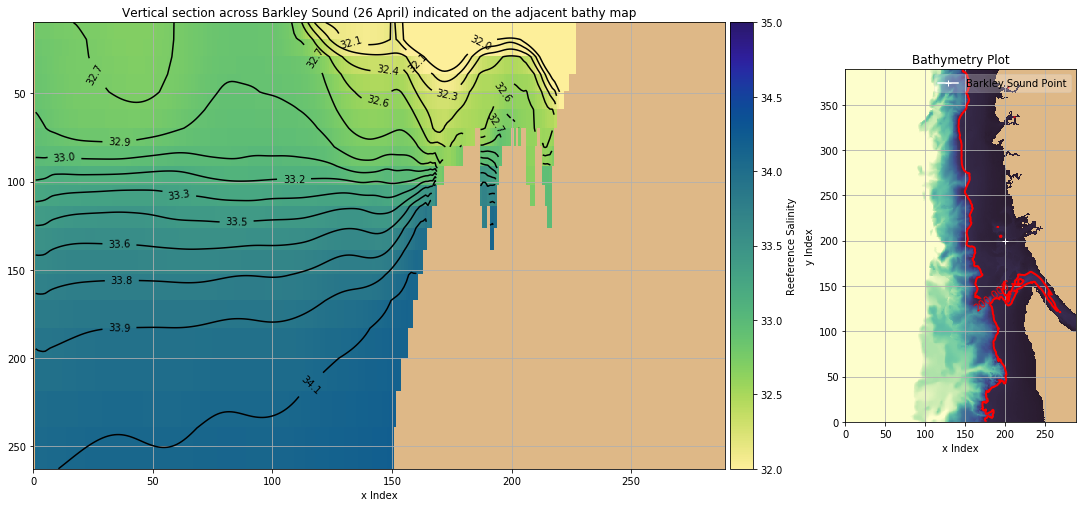

In [82]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, Z, cmap=cmap)
axr.plot(
    x_slice[200], y_slice[200],
    linestyle='-', marker='+', color='white',
    label='Barkley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,Z, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 599
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(x_slice, zlevels[:20], sal_tzyx[:20,200,x_slice], cmap=cmap, vmin=32, vmax=35)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:20], sal_tzyx[:20,200,x_slice], np.arange(32, 35, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound (26 April) indicated on the adjacent bathy map')